# HW3 PART A

Import required packages for EDA

In [1]:
import pandas as pd #Import pandas as pd
import numpy as np #Import numpy as np
import matplotlib.pyplot as plt #import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor #Import MLP Regressor
from matplotlib import pyplot #import pyplot
from shapely.geometry import Point 
import geopandas as gpd #import geopandas as gpd
from geopandas import GeoDataFrame #Import GeoDataframe for mapping purposes

Import necessary datasets

data = JMA dataset

data_2 = Argo dataset

In [2]:
data = pd.read_csv('C:/Users/zacha/Dropbox/PhD ODU/Courses/Spring 2023/OEAS895/jma_nitrate.csv',sep=',') #Jma
data = data[data['nitrate']>0] #remove nitrate values below 0 that are placeholders for NAs

data_2 = pd.read_csv('C:/Users/zacha/Dropbox/PhD ODU/Courses/Spring 2023/OEAS895/kuro_BGCargo_NO3.csv',sep=',') #Argo

print the information about the jma dataset to examine columns and data types

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15574 entries, 0 to 16220
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15574 non-null  int64  
 1   theta       15574 non-null  float64
 2   sal         15574 non-null  float64
 3   depth       15574 non-null  int64  
 4   nitrate     15574 non-null  float64
 5   lon         15574 non-null  float64
 6   lat         15574 non-null  float64
 7   date        15574 non-null  object 
 8   year        15574 non-null  float64
 9   month       15574 non-null  float64
 10  day         15574 non-null  float64
 11  profile     15574 non-null  float64
 12  cruise      15574 non-null  object 
 13  vessel      15574 non-null  object 
 14  density     15574 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 1.9+ MB


14 columns - majority are float64s but a couple objects. Will transition if necessary 

Print the information about the Argo dataset

In [14]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14118 entries, 0 to 16135
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date/GMT             14118 non-null  object 
 1   Days since 1/1/1900  14118 non-null  float64
 2   NITRATE[uMOL/KG]     14118 non-null  float64
 3   DEPTH[M]             14118 non-null  float64
 4   PRESSURE[DBAR]       14118 non-null  float64
 5   NA                   14118 non-null  int64  
 6   SALINITY[PSS]        14118 non-null  float64
 7   TEMPERATURE[C]       14118 non-null  float64
 8   SIGMATHETA[KG/M3]    14118 non-null  float64
 9   OXYGEN[uMOL/KG]      14118 non-null  float64
 10  OXYGENSAT            14118 non-null  float64
 11  LON                  14118 non-null  float64
 12  LAT                  14118 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Argo dataset has less columns and almost all float64s. 

Column names seem different then the JMA dataset - need to ensure that metrics are the same later

Search jma dataset for NAs

In [15]:
data.isna().sum() # Searches for NAs in each column

Unnamed: 0    0
theta         0
sal           0
depth         0
nitrate       0
lon           0
lat           0
date          0
year          0
month         0
day           0
profile       0
cruise        0
vessel        0
density       0
dtype: int64

No NAs present in jma dataset 

Search Argo dataset for NAs

In [16]:
data_2.isna().sum() # Searches for NAs in each column

Date/GMT               0
Days since 1/1/1900    0
NITRATE[uMOL/KG]       0
DEPTH[M]               0
PRESSURE[DBAR]         0
NA                     0
SALINITY[PSS]          0
TEMPERATURE[C]         0
SIGMATHETA[KG/M3]      0
OXYGEN[uMOL/KG]        0
OXYGENSAT              0
LON                    0
LAT                    0
dtype: int64

No NAs present in either dataset. 

Will search now for any zeros present in the datasets first with jma

In [17]:
(data == 0).sum() #searches for zeros in each column

Unnamed: 0      1
theta           0
sal             0
depth         404
nitrate         0
lon             0
lat             0
date            0
year            0
month           0
day             0
profile         0
cruise          0
vessel          0
density         0
dtype: int64

Zeros seem to only be present in the depth column. Not sure if zero is a typical value - measurments directly at the surface?

Now search for any zeros present in the Argo dataset

In [5]:
(data_2 == 0).sum() #searches for zeros in each column

Date/GMT               0
Days since 1/1/1900    0
NITRATE[uMOL/KG]       0
DEPTH[M]               0
PRESSURE[DBAR]         0
NA                     0
SALINITY[PSS]          0
TEMPERATURE[C]         0
SIGMATHETA[KG/M3]      0
OXYGEN[uMOL/KG]        0
OXYGENSAT              0
LON                    0
LAT                    0
dtype: int64

No zeros present in the Argo dataset. This makes the numerous zeros for depth for the jma dataset seem weirder. May revisit this later.

Now examine the size of the datasets - first jma

In [21]:
# Explore the shape of the BGC Argo data (nrows, ncols)
data_2.shape

(14118, 13)

In [22]:
data.size #total number of datapoints in the jma dataframe (ncol * nrows)

233610

Now examine the size of the Argo dataset

In [24]:
data_2.size #total number of datapoints in the BGC Argo dataframe (ncol * nrows)

183534

Seems like jma dataset is significantly bigger

## Descriptive statistics

Look at descriptive stats for jma

In [25]:
data.describe()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,year,month,day,profile,density
count,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000
mean,8175.135932,7.042844,34.433404,1418.388211,26.855277,151.599624,32.696928,2012.313664,6.851034,13.509375,268.636766,26.574613
std,4675.484666,7.113994,0.354281,1528.846644,15.480812,9.692016,8.979100,1.684952,2.660677,8.723439,148.651926,1.221275
min,0.000000,0.034400,32.349200,0.000000,0.010000,133.990833,0.332167,2010.000000,2.000000,1.000000,1.000000,20.951302
25%,4105.250000,1.589650,34.240600,203.000000,11.250000,145.727833,30.003333,2011.000000,5.000000,6.000000,139.000000,25.882225
50%,8228.500000,3.418650,34.550800,803.000000,35.350000,148.149667,34.239500,2012.000000,7.000000,12.000000,275.000000,27.094050
75%,12223.750000,12.294850,34.681800,2002.000000,39.797500,164.231000,39.660833,2013.000000,9.000000,20.000000,394.000000,27.527512
max,16220.000000,29.923300,35.548100,6161.000000,45.330000,170.035167,49.991500,2016.000000,12.000000,31.000000,529.000000,27.681606


Now descriptive stats for the Argo dataset

In [26]:
data_2.describe()

,Days since 1/1/1900,NITRATE[uMOL/KG],DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT
count,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,1.411800e+04,1.411800e+04,14118.000000,14118.00000
mean,42020.134744,13.167418,-308.132532,-310.725492,6.641167,34.444247,13.177575,25.800810,inf,inf,166.996243,33.43037
std,411.744603,13.164640,257.806675,260.216590,3.261655,0.266298,5.165774,0.827549,inf,inf,6.850736,1.98193
min,41335.568000,0.010000,-990.493000,-999.800000,1.000000,33.675300,3.018000,21.966000,2.280000e+01,7.100000e+00,148.325000,30.09200
25%,41658.354000,3.660000,-378.556500,-381.590000,4.000000,34.234225,9.525750,25.350000,1.864000e+02,7.000000e+01,162.973000,31.81300
50%,42018.476000,7.990000,-239.649500,-241.500000,7.000000,34.484300,14.511050,25.706000,2.095000e+02,8.410000e+01,169.174000,32.74100
75%,42382.406000,17.690000,-110.028500,-110.860000,9.000000,34.669550,16.709075,26.357000,2.247000e+02,9.300000e+01,171.626000,35.10400
max,42736.536000,50.460000,-5.450000,-5.490000,12.000000,35.350200,27.426200,27.410000,1.790000e+308,1.790000e+308,176.199000,37.75900


Seems like Depth is calculated differently for Argo dataframe

Appears jma is positive and BGC Argo is negative (for depth below sealevel)

Will convert so they are comparable

In [3]:
data_2['DEPTH[M]'] = data_2['DEPTH[M]'].apply(lambda x: x*-1)

In [29]:
data_2.describe() # Confirm that this worked

,Days since 1/1/1900,NITRATE[uMOL/KG],DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT
count,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,1.411800e+04,1.411800e+04,14118.000000,14118.00000
mean,42020.134744,13.167418,308.132532,-310.725492,6.641167,34.444247,13.177575,25.800810,inf,inf,166.996243,33.43037
std,411.744603,13.164640,257.806675,260.216590,3.261655,0.266298,5.165774,0.827549,inf,inf,6.850736,1.98193
min,41335.568000,0.010000,5.450000,-999.800000,1.000000,33.675300,3.018000,21.966000,2.280000e+01,7.100000e+00,148.325000,30.09200
25%,41658.354000,3.660000,110.028500,-381.590000,4.000000,34.234225,9.525750,25.350000,1.864000e+02,7.000000e+01,162.973000,31.81300
50%,42018.476000,7.990000,239.649500,-241.500000,7.000000,34.484300,14.511050,25.706000,2.095000e+02,8.410000e+01,169.174000,32.74100
75%,42382.406000,17.690000,378.556500,-110.860000,9.000000,34.669550,16.709075,26.357000,2.247000e+02,9.300000e+01,171.626000,35.10400
max,42736.536000,50.460000,990.493000,-5.490000,12.000000,35.350200,27.426200,27.410000,1.790000e+308,1.790000e+308,176.199000,37.75900


Now depth is positive for both datasets

Depth seems much greater for jma dataset

## Depth Comparison

In [35]:
data.loc[data['depth'].idxmax()] # Look at max depth for jma

Unnamed: 0               7620
theta                  1.0287
sal                   34.6943
depth                    6161
nitrate                 34.68
lon                    147.47
lat                 30.005333
date               2012/07/08
year                   2012.0
month                     7.0
day                       8.0
profile                 254.0
cruise                  12-05
vessel         R/V Ryofu Maru
density              27.66761
Name: 7620, dtype: object

Max depth for jma is 6161

In [37]:
data_2.loc[data_2['DEPTH[M]'].idxmax()] # Look at max depth for Argo

Date/GMT               11/15/2016 15:28
Days since 1/1/1900           42689.644
NITRATE[uMOL/KG]                  44.24
DEPTH[M]                        990.493
PRESSURE[DBAR]                   -999.8
NA                                   11
SALINITY[PSS]                   34.2756
TEMPERATURE[C]                   3.6714
SIGMATHETA[KG/M3]                 27.25
OXYGEN[uMOL/KG]                    26.2
OXYGENSAT                           8.2
LON                             175.465
LAT                              31.469
Name: 15593, dtype: object

Max depth for jma is 990.493 - signficantly smaller than jma

Now plot comparitive histogram

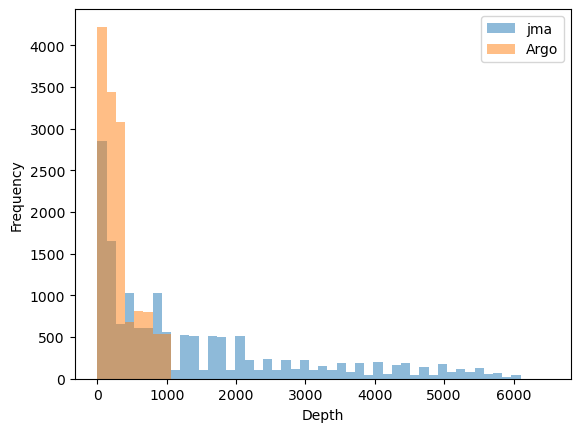

In [5]:
jma_Depth = [data['depth']] #create jma depth standalone
Argo_Depth =[data_2['DEPTH[M]']]  #create Argo depth standalone

bins = np.linspace(0, 6500) #Set size of plot based on max jma value

pyplot.hist(jma_Depth, bins, alpha=0.5, label='jma') #load jma depth
pyplot.hist(Argo_Depth, bins, alpha=0.5, label='Argo') #load Argo depth
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Depth') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.show() #show plot

Argo dataset is all below 1000m 

jma dataset is spread out more across greater depths but also has a substantial amount of measurments right at sealevel

## Geographic Range

Explore geographic range of jma dataset

Text(80.34722222222221, 0.5, 'Latitude')

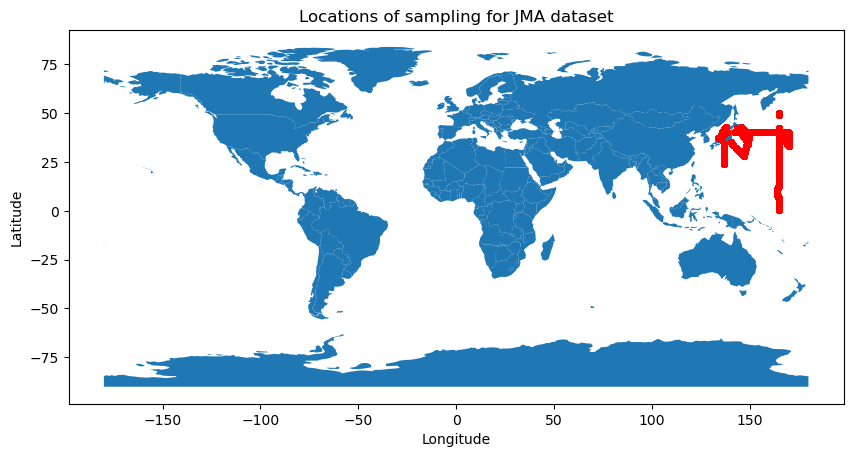

In [5]:
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])] #load in longitude and latitude data for jma
gdf = GeoDataFrame(data, geometry=geometry) #set geodataframe


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #load in basic map
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15) #plot points on map
pyplot.title('Locations of sampling for JMA dataset') #load Title
pyplot.xlabel('Longitude') # #load x label
pyplot.ylabel('Latitude') #load y label

Appears to be a lot of measurments in the Pacific ocean - many right off the coast of Japan

Explore geographic range of Argo dataset

<AxesSubplot:>

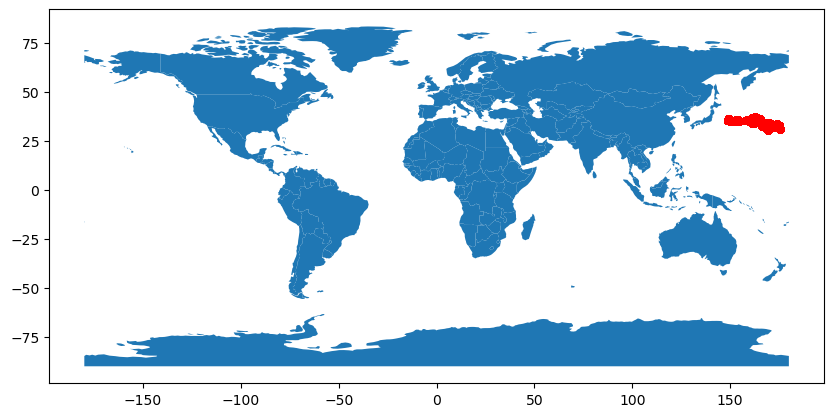

In [6]:
# Explore geographic range of Argo dataset

geometry = [Point(xy) for xy in zip(data_2['LON'], data_2['LAT'])] #load in longitude and latitude data for Argo
gdf = GeoDataFrame(data_2, geometry=geometry) #set geodataframe 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #load in basic map
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15) #plot points on map
pyplot.title('Locations of sampling for Argo dataset') #load Title
pyplot.xlabel('Longitude') # #load x label
pyplot.ylabel('Latitude') #load y label

Both datasets seem to be from Pacific Ocean near Japan

Argo datapoints seem clustered closer together

Jma datapoints seem to be more widespread and further off the coast of Japan likely explaining greater max depth

## Salinity

In [7]:
data.loc[data['sal'].idxmax()] #Look at max salinity for jma

Unnamed: 0                              4993
theta                                27.5948
sal                                  35.5481
depth                                    126
nitrate                                 5.35
lon                                  165.002
lat                                 0.332167
date                              2011/08/09
year                                  2011.0
month                                    8.0
day                                      9.0
profile                                163.0
cruise                                 11-08
vessel                        R/V Ryofu Maru
density                            22.811166
geometry      POINT (165.002 0.332166666667)
Name: 4993, dtype: object

In [9]:
data_2.loc[data_2['SALINITY[PSS]'].idxmax()] ## Look at max salinity for Argo

Date/GMT                     04/23/2015 11:32
Days since 1/1/1900                 42117.481
NITRATE[uMOL/KG]                         0.35
DEPTH[M]                              -16.445
PRESSURE[DBAR]                         -16.56
NA                                          4
SALINITY[PSS]                         35.3502
TEMPERATURE[C]                        21.2043
SIGMATHETA[KG/M3]                      24.707
OXYGEN[uMOL/KG]                         226.8
OXYGENSAT                               103.0
LON                                   168.878
LAT                                    31.032
geometry               POINT (168.878 31.032)
Name: 9056, dtype: object

Max salinity greater for jma but just slightly

Now plot histogram

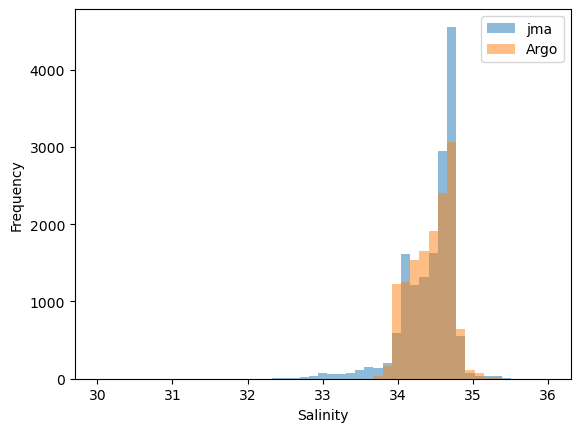

In [9]:
jma_salinity = [data['sal']] #create jma salinity standalone
Argo_salinity = [data_2['SALINITY[PSS]']] #create Argo salinity standalone

bins = np.linspace(30, 36) #Set size of plot based on max jma value

pyplot.hist(jma_salinity, bins, alpha=0.5, label='jma') #load jma salinity
pyplot.hist(Argo_salinity, bins, alpha=0.5, label='Argo') #load Argo salinity
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Salinity') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.show() #show plot

Greater range of salinities for jma dataset

Higher salinity more frequent for jma dataset - but much better overlap compared to depth

## Density

In [7]:
data.loc[data['density'].idxmax()] # Look at max density for jma

Unnamed: 0               3913
theta                  0.9072
sal                   34.7018
depth                    5297
nitrate                 33.82
lon                164.981667
lat                 13.487833
date               2011/07/23
year                   2011.0
month                     7.0
day                      23.0
profile                 133.0
cruise                  11-08
vessel         R/V Ryofu Maru
density             27.681606
Name: 3913, dtype: object

In [8]:
data_2.loc[data_2['SIGMATHETA[KG/M3]'].idxmax()] # Look at max density for Argo - remember density is sigmatheta

Date/GMT               03/28/2013 14:41
Days since 1/1/1900           41361.612
NITRATE[uMOL/KG]                  42.82
DEPTH[M]                        988.394
PRESSURE[DBAR]                  -998.03
NA                                    3
SALINITY[PSS]                   34.3993
TEMPERATURE[C]                    3.018
SIGMATHETA[KG/M3]                 27.41
OXYGEN[uMOL/KG]                    34.9
OXYGENSAT                          10.8
LON                             148.346
LAT                              35.628
Name: 300, dtype: object

Max density seems slightly higher for jma

Now plot histogram

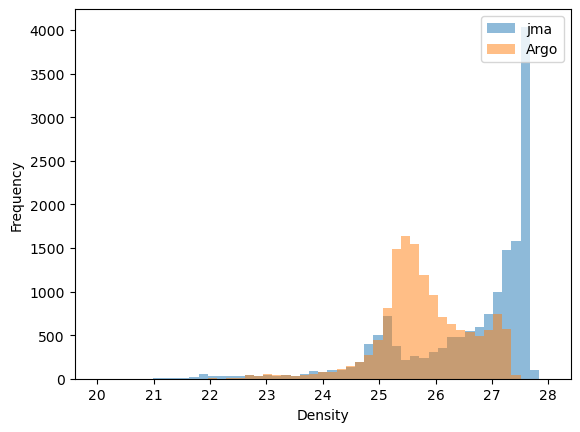

In [10]:
jma_density = [data['density']] #create jma density standalone
Argo_density = [data_2['SIGMATHETA[KG/M3]']] #create Argo density standalone
 
bins = np.linspace(20, 28) #Set size of plot based on max jma value

pyplot.hist(jma_density, bins, alpha=0.5, label='jma') #load jma denisty
pyplot.hist(Argo_density, bins, alpha=0.5, label='Argo') #load Argo density
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Density') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.show() #show plot

higher densities much more frequent for jma

greater range of densities for jma

more frequent lower densities for Argo

## Timeframe

Create new variables for Argo dataset for year and month

In [11]:
data_2['year'] = pd.DatetimeIndex(data_2['Date/GMT']).year #creates year column based on Date
data_2['month'] = pd.DatetimeIndex(data_2['Date/GMT']).month #creates month column based on Date

In [12]:
data_2['year'] #ensure this worked for year

0        2013
1        2013
2        2013
3        2013
4        2013
         ... 
16122    2016
16129    2016
16133    2017
16134    2017
16135    2017
Name: year, Length: 14118, dtype: int64

In [13]:
data_2['month'] #ensure this worked for month

0         3
1         3
2         3
3         3
4         3
         ..
16122    12
16129    12
16133     1
16134     1
16135     1
Name: month, Length: 14118, dtype: int64

Compare month overlap with histogram

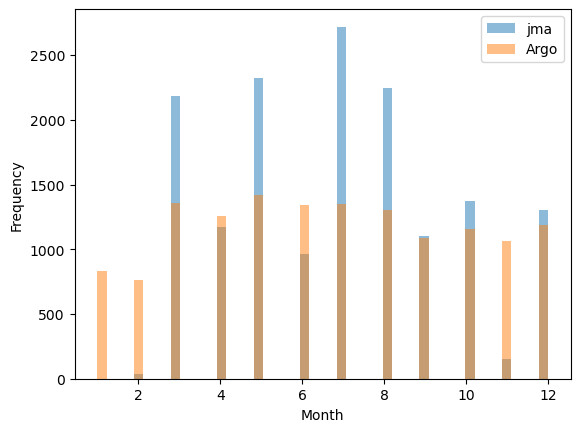

In [9]:
jma_month = [data['month']] #create jma month standalone
Argo_month = [data_2['month']] #create Argo month standalone

bins = np.linspace(1, 12) #Set size of plot based on number of months

pyplot.hist(jma_month, bins, alpha=0.5, label='jma') #load jma months
pyplot.hist(Argo_month, bins, alpha=0.5, label='Argo') #load Argo months
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Month') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.show() #show plot

No jma data from January and very little from February 

Much more jma data during March - August

Now compare year overlap

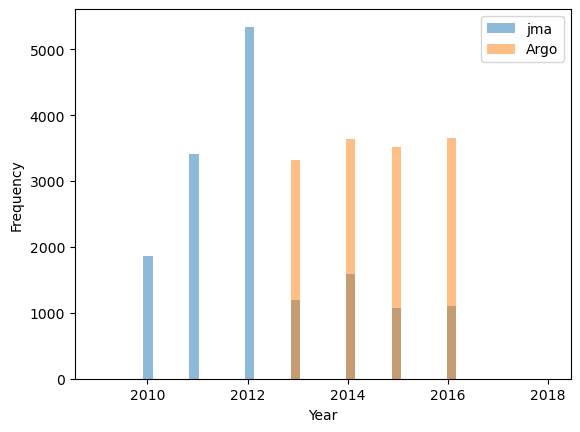

In [16]:
jma_year = [data['year']] #create jma year standalone
Argo_year = [data_2['year']] #create Argo year standalone

bins = np.linspace(2009, 2018,) #Set size of plot based on relevant years

pyplot.hist(jma_year, bins, alpha=0.5, label='jma')  #load jma years
pyplot.hist(Argo_year, bins, alpha=0.5, label='Argo') #load Argo years
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Year') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.show() #show plot

No Argo data from 2010-2012

Much more Argo datapoints for 2013-2016 than for jma

## Temperature

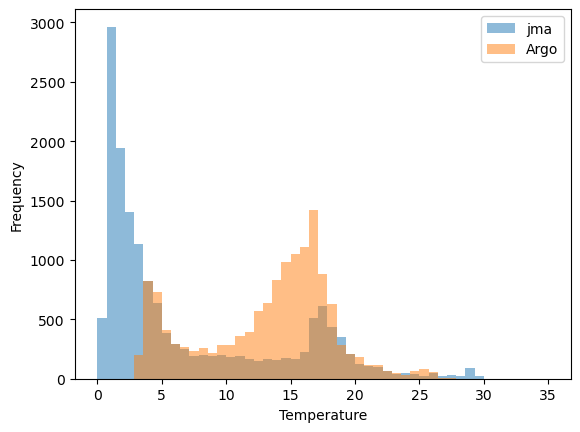

In [18]:
Argo_temp = [data_2['TEMPERATURE[C]']] #create Argo temp standalone
jma_temp = [data['theta']] #create jma temp standalone

bins = np.linspace(0, 35) #Set size of plot based on relevant temps

pyplot.hist(jma_temp, bins, alpha=0.5, label='jma') #load jma temps
pyplot.hist(Argo_temp, bins, alpha=0.5, label='Argo') #load Argo temps
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Temperature') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.show() #show plot 

Much wider range of temperatures for jma

A lot more lower temp datapoints for jma

# HW3 PART B

In [9]:
y = data.nitrate
x = data[['density','depth','sal']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
standardized_x = scaler.transform(x_train)
standardized_x_test = scaler.transform(x_test) #Train the model using the training sets

#regr.fit(standardized_x, y_train)# Make predictions using the testing set
#y_pred = regr.predict(standardized_x_test)

In [12]:
n = 5
d = 5
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(n,d),
                     activation='relu', max_iter=10000)

model.fit(standardized_x,y_train)

y_pred = model.predict(standardized_x_test)

print('r2 =', r2_score(y_train, model.predict(standardized_x)))
print('r2 =', r2_score(y_test, y_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test, y_pred)))

r2 = 0.9556572538646133
r2 = 0.9567264936893907
RMSE = 3.209695527721116


In [21]:
n = [1,2,3,4,5]
d = [1,2,3,4,5]
scores = {}

for nodes in n:
    for layer in d:
        model = MLPRegressor(hidden_layer_sizes=(nodes,layer),
                     activation='relu', max_iter=10000)
        model.fit(standardized_x,y_train)
        y_pred = model.predict(standardized_x_test)
        scores[nodes,layer] = r2_score(y_test,y_pred)
scores

{(1, 1): 0.9183772330633798,
 (1, 2): 0.9183543132967511,
 (1, 3): 0.9229062070692499,
 (1, 4): 0.9221762769776769,
 (1, 5): 0.9221822203420508,
 (2, 1): 0.9217880460679118,
 (2, 2): 0.9184266634222855,
 (2, 3): 0.9592462062046597,
 (2, 4): 0.9614744392882039,
 (2, 5): 0.9649720326003973,
 (3, 1): 0.9629653377232652,
 (3, 2): 0.962241595495597,
 (3, 3): 0.9673820187325247,
 (3, 4): 0.9674697986143379,
 (3, 5): 0.922990059824236,
 (4, 1): 0.9659012415648734,
 (4, 2): 0.9298542776695222,
 (4, 3): 0.969515560248995,
 (4, 4): 0.9227393006417743,
 (4, 5): 0.9628803798912804,
 (5, 1): 0.9661437401388808,
 (5, 2): 0.9269932918171265,
 (5, 3): 0.9779538216859152,
 (5, 4): 0.9822310448951731,
 (5, 5): 0.9814627361600795}

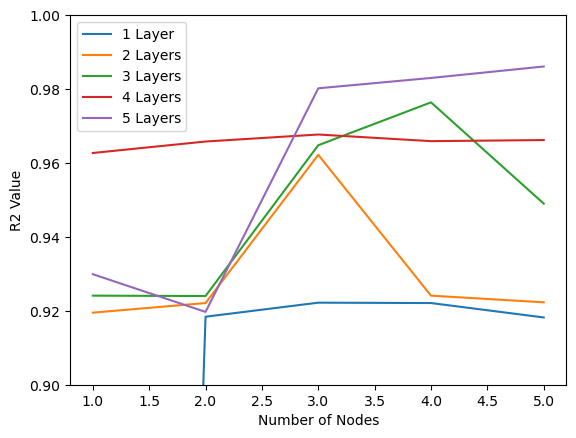

In [22]:
nodes = [1,2,3,4,5]
layer1 = [-2.099e-05,0.9184,0.9222,0.9221,0.9182]
layer2 = [0.9195,0.9221,0.9622,0.9241,0.9223]
layer3 = [0.9241,0.9240,0.9648,0.9764,0.9490]
layer4 = [0.9627,0.9658,0.9677,0.9659,0.9662]
layer5 = [0.9299,0.9197,0.9802,0.9830,0.9861]

plt.plot(nodes, layer1, label = "1 Layer")
plt.plot(nodes, layer2, label = "2 Layers")
plt.plot(nodes, layer3, label = "3 Layers")
plt.plot(nodes, layer4, label = "4 Layers")
plt.plot(nodes, layer5, label = "5 Layers")
plt.ylim((0.9,1))
plt.xlabel("Number of Nodes")
plt.ylabel("R2 Value")
plt.legend()
plt.show()

Overall, r2 values increase by the number of layers, and in some cases number of nodes, but not consistently. Aside from 1,1 all were well correlated, r2 >= 0.92

The highest r2 value was for nodes = 5, layers = 5

In [13]:
newdata = pd.read_csv('C:/Users/zacha/Dropbox/PhD ODU/Courses/Spring 2023/OEAS895/kuro_BGCargo_noNO3.csv',sep=',')

newdata['density']=newdata['SIGMATHETA[KG/M3]']
newdata['depth']=newdata['DEPTH[M]'].apply(lambda x: x*-1)
newdata['sal']=newdata['SALINITY[PSS]']
argox = newdata[['density','depth','sal']]
argox_standardized = scaler.transform(argox)

model = MLPRegressor(hidden_layer_sizes=(5,5),
                     activation='relu', max_iter=10000)
model.fit(standardized_x,y_train)
argopred = model.predict(argox_standardized)

In [14]:
print('r2 =', r2_score(data_2['NITRATE[uMOL/KG]'], argopred))
print('RMSE =',np.sqrt(mean_squared_error(data_2['NITRATE[uMOL/KG]'], argopred)))

r2 = 0.9330894705204672
RMSE = 3.4160882974630473


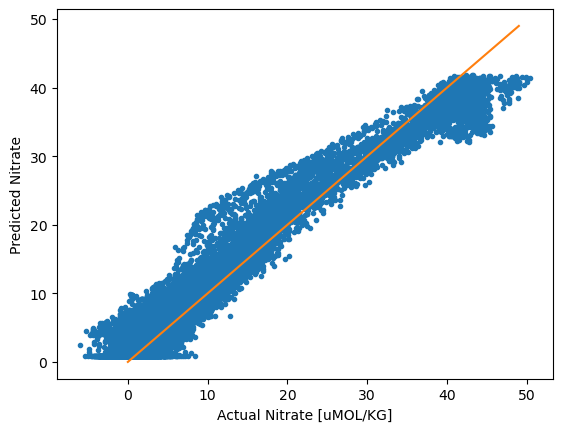

In [15]:
onetoone = range(50)
plt.plot(data_2['NITRATE[uMOL/KG]'],argopred,'.', c=)
plt.plot(onetoone,onetoone)
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.show()

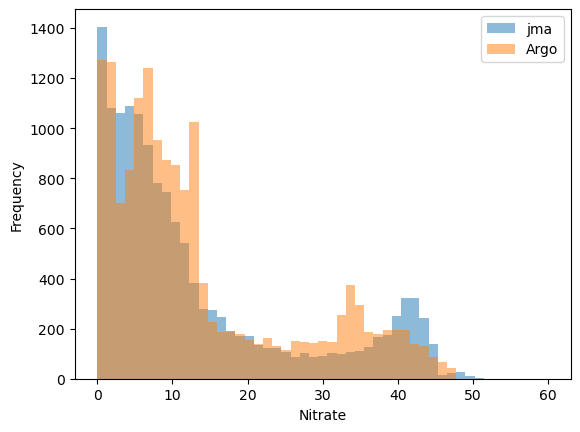

In [46]:
Argo_pred_values=argopred

bins = np.linspace(0, 60) #Set size of plot based on relevant nitrate values

pyplot.hist(data_2['NITRATE[uMOL/KG]'], bins, alpha=0.5, label='jma') #load real data
pyplot.hist(Argo_pred_values, bins, alpha=0.5, label='Argo') #load predicted
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Nitrate') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.show() #show plot 

In [24]:
data_2['Real_Nitrate_Depth'] = (data_2['NITRATE[uMOL/KG]']/data_2['DEPTH[M]'])

newdata['Pred_Nitrate_Depth'] = (argopred/data_2['DEPTH[M]'])

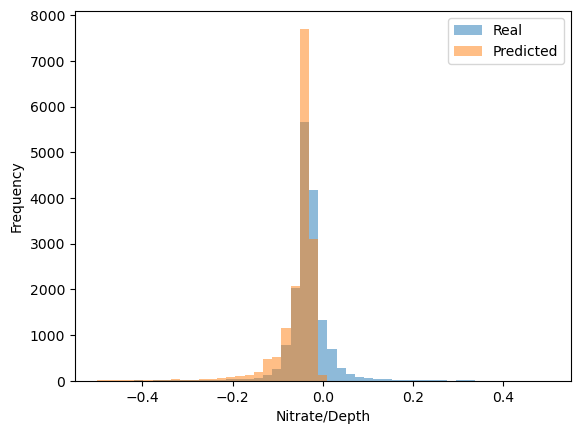

In [32]:
bins = np.linspace(-.5,.5) #Set size of plot based on relevant nitrate values

pyplot.hist(data_2['Real_Nitrate_Depth'], bins, alpha=0.5, label='Real') #load real data
pyplot.hist(newdata['Pred_Nitrate_Depth'], bins, alpha=0.5, label='Predicted') #load predicted
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Nitrate/Depth') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.show() #show plot 

In [40]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date/GMT             16136 non-null  object 
 1   Days since 1/1/1900  16136 non-null  float64
 2   NITRATE[uMOL/KG]     16136 non-null  float64
 3   DEPTH[M]             16136 non-null  float64
 4   PRESSURE[DBAR]       16136 non-null  float64
 5   NA                   16136 non-null  int64  
 6   SALINITY[PSS]        16136 non-null  float64
 7   TEMPERATURE[C]       16136 non-null  float64
 8   SIGMATHETA[KG/M3]    16136 non-null  float64
 9   OXYGEN[uMOL/KG]      16136 non-null  float64
 10  OXYGENSAT            16136 non-null  float64
 11  LON                  16136 non-null  float64
 12  LAT                  16136 non-null  float64
 13  Real_Nitrate_Depth   16136 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.7+ MB


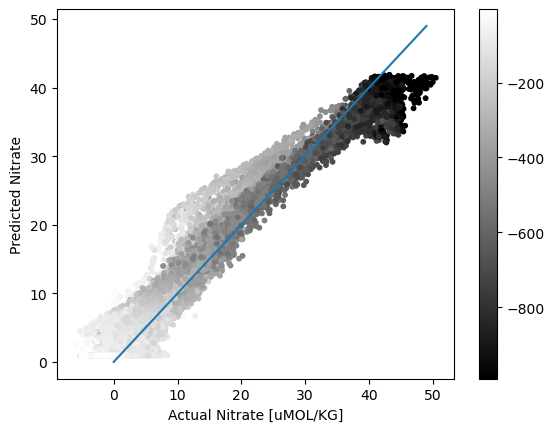

In [54]:
onetoone = range(50)
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['DEPTH[M]'], s=10)
plt.plot(onetoone,onetoone)
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.colorbar()
plt.gray()

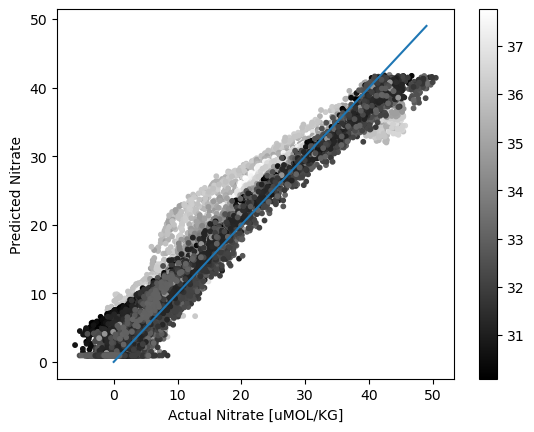

In [50]:
onetoone = range(50)
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['LAT'], s=10)
plt.plot(onetoone,onetoone)
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.colorbar()
plt.gray()

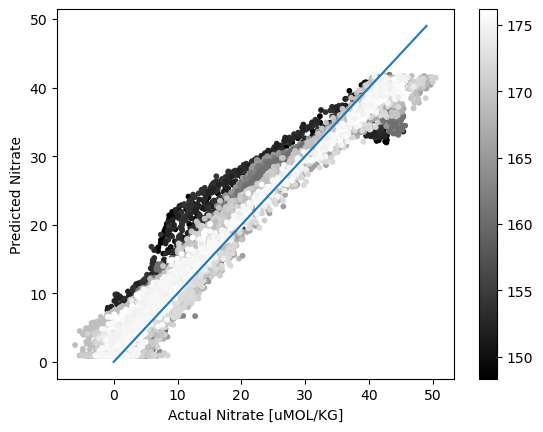

In [56]:
onetoone = range(50)
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['LON'], s=10)
plt.plot(onetoone,onetoone)
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.colorbar()
plt.gray()